In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import odeint, solve_ivp
from scipy.stats import entropy
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pathlib import Path
%matplotlib inline
import numpy
import scipy, scipy.integrate, scipy.optimize
import matplotlib

## Poincare Recurrence in time-evolving RPS
Main function to simulate 3-strategy RPS with doubly evolving matrices. Uses odeint to integrate the differential equations and returns a dictionary that contains all necessary data.

In [3]:
P = np.matrix([ [0, -1, 1],
                [1, 0, -1],
                [-1, 1, 0] ])

In [4]:


def RPSderiv(s,t,P,mu):
    """ Defines the ODE for time evolving RPS. 
    
    Parameters:
    s (array): Array-like of initial conditions [y1, y2, y3, w1, w2, w3]
    t (int): Time to integrate function over
    P (matrix): Standard RPS payoff matrix
    mu (float): Parameter for time evolving system
    
    Returns:
    array: concatenated derivatives of x and w
    """
    x = np.array([[s[0]], [s[1]], [s[2]]])
    w = np.array([[s[3]], [s[4]], [s[5]]])

    A = np.matrix([ [0, (x[1][0]-x[0][0]), (x[2][0]-x[0][0])],
                    [(x[0][0]-x[1][0]), 0, (x[2][0]-x[1][0])],
                    [(x[0][0]-x[2][0]), (x[1][0]-x[2][0]), 0] ])
    B = np.matrix([ [0, (w[0][0]-w[1][0]), (w[0][0]-w[2][0])],
                     [(w[1][0]-w[0][0]), 0, (w[1][0]-w[2][0])],
                     [(w[2][0]-w[0][0]), (w[2][0]-w[1][0]), 0] ])
    Pw = P + mu*B
    dxdt = np.multiply(x, np.matmul(Pw, x)-x.T@Pw@x).flatten().tolist()[0]
    dwdt = np.multiply(w, A@w - w.T@A@w).flatten().tolist()[0]
    
    return np.array(dxdt+dwdt)

def RPSTrajectory(f=RPSderiv, s=[0.1, 0.3, 0.6, 0.1, 0.3, 0.6],
    timestep=0.1, numstep=2000, mu=0.1, P=P) :
    """ Runs ODEint for the RPS system
    
    Parameters:
    s (array): Array-like of initial conditions [x1, x2, x3, w1, w2, w3]
    timestep (float): Timestep of each iteration of the integration
    numstep (int): Number of iterations to be performed
    P (matrix): Standard RPS payoff matrix
    mu (float): Parameter for time evolving system
    
    Returns: 
    dict: Keys are (times, x1, x2, x3, w1, w2, w3)
    The values associated with the keys are time series.
    """
    partuple=(P, mu)        # Converts parameters to a tuple in the right order
    tvals=numpy.arange(numstep)*timestep
    traj=scipy.integrate.odeint(f,s,tvals,partuple)
    # Store the results of odeint in a dictionary
    data={}
    data["times"]=tvals
    data["y1"]=traj[:,0]
    data["y2"]=traj[:,1]
    data["y3"]=traj[:,2]
    data["w1"]=traj[:,3]
    data["w2"]=traj[:,4]
    data["w3"]=traj[:,5]
    return data

Run the function to get data for plotting

In [5]:
s1=[0.1, 0.2, 0.7, 0.7, 0.2, 0.1]
data = RPSTrajectory(s=s1, f=RPSderiv, numstep=10000)

### Plot phase portraits

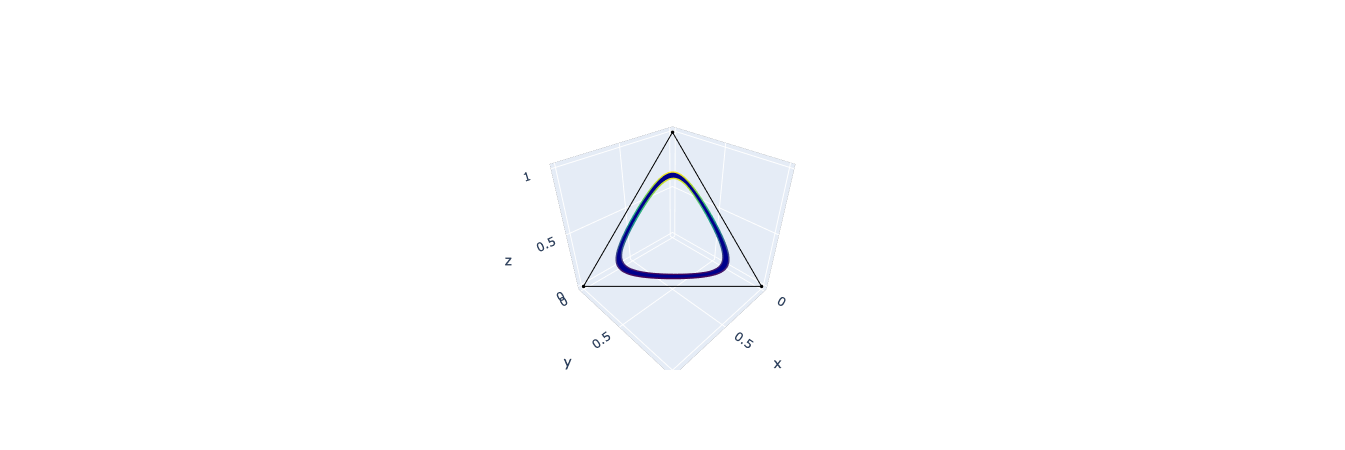

In [6]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

x = data['y1']
y = data['y2']
z = data['y3']

fig = go.Figure(data=go.Scatter3d(x=x, y=y, z=z, marker=dict(size=2,color=z,colorscale='viridis',),
                                  line=dict(color='darkblue',width=1), showlegend=False))

p1=[1, 0, 0, 1]
p2=[0, 1, 0, 0]
p3=[0, 0, 1, 0]

fig.add_trace(go.Scatter3d(x=p1, y=p2, z=p3, marker=dict(size=2, color='black',),
                           line=dict(color='black', width=2),showlegend=False))

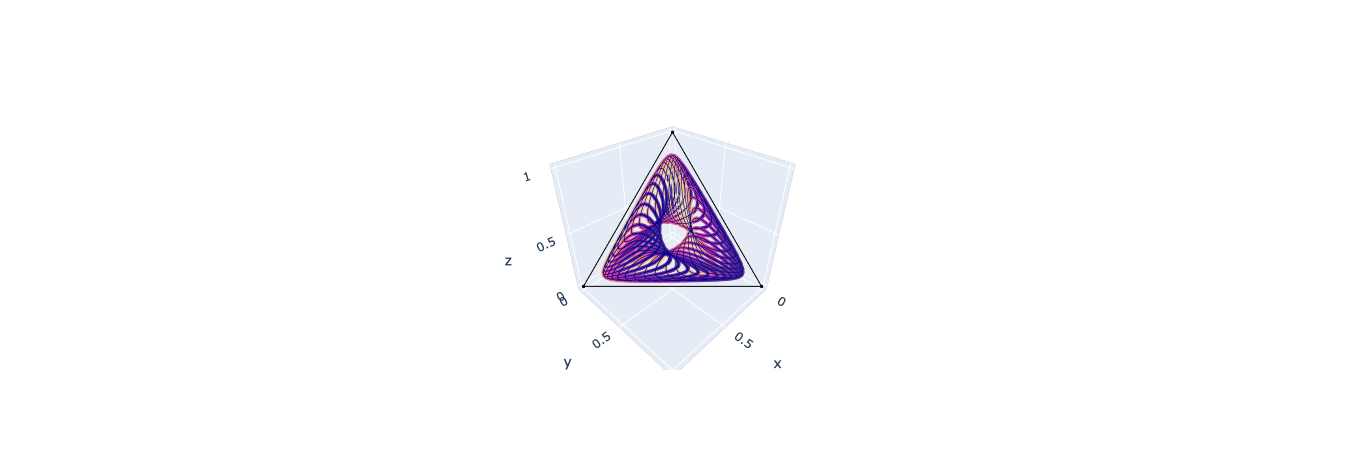

In [7]:
x2 = data['w1']
y2 = data['w2']
z2 = data['w3']


fig1 = go.Figure(data=go.Scatter3d(x=x2, y=y2, z=z2, marker=dict(size=2, color=z, colorscale='agsunset',),
                                   line=dict(color='darkblue',width=1), showlegend=False))

p1=[1, 0, 0, 1]
p2=[0, 1, 0, 0]
p3=[0, 0, 1, 0]

fig1.add_trace(go.Scatter3d(x=p1, y=p2, z=p3, marker=dict(size=2,color='black',),
                            line=dict(color='black',width=2),showlegend=False))

